Yellow:  [0.00246753, 0.00249717, 0.00280643, 0.00267444, 0.00263167, 0.00266812, 0.00234512, 0.00270804, 0.0025936, 0.00262956, 0.00262175, 0.00253222, 0.00258748, 0.00270241, 0.00299332, 0.00269821, 0.00260338, 0.00294309, 0.00293615, 0.0031069, 0.00145786]

Anubis:  [0.00180028, 0.00184121, 0.00206637, 0.0019147, 0.00190751, 0.00197335, 0.00170747, 0.00201418, 0.00189046, 0.00190733, 0.00190746, 0.00186637, 0.00185169, 0.00195417, 0.00214135, 0.00198867, 0.00189092, 0.00211435, 0.00215452, 0.00227986, 0.000930613]

All:  [0.00232159, 0.00235742, 0.00263869, 0.00247607, 0.0024513, 0.00250381, 0.00219367, 0.00256251, 0.00243037, 0.00246193, 0.00245277, 0.002385, 0.00239874, 0.00251451, 0.00276133, 0.00254149, 0.00243788, 0.00274023, 0.00273055, 0.00289732, 0.00141536]



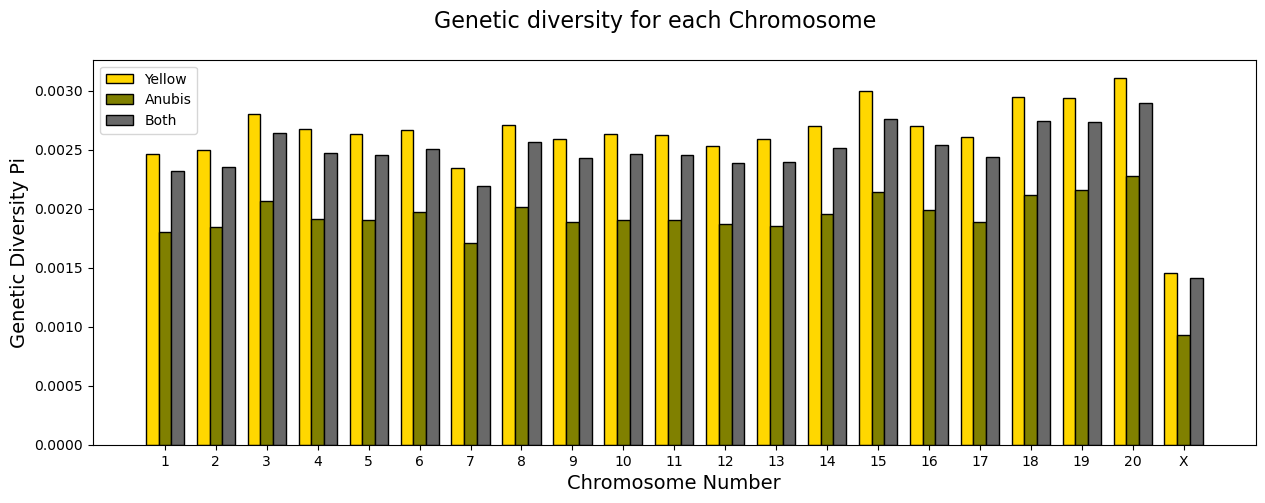

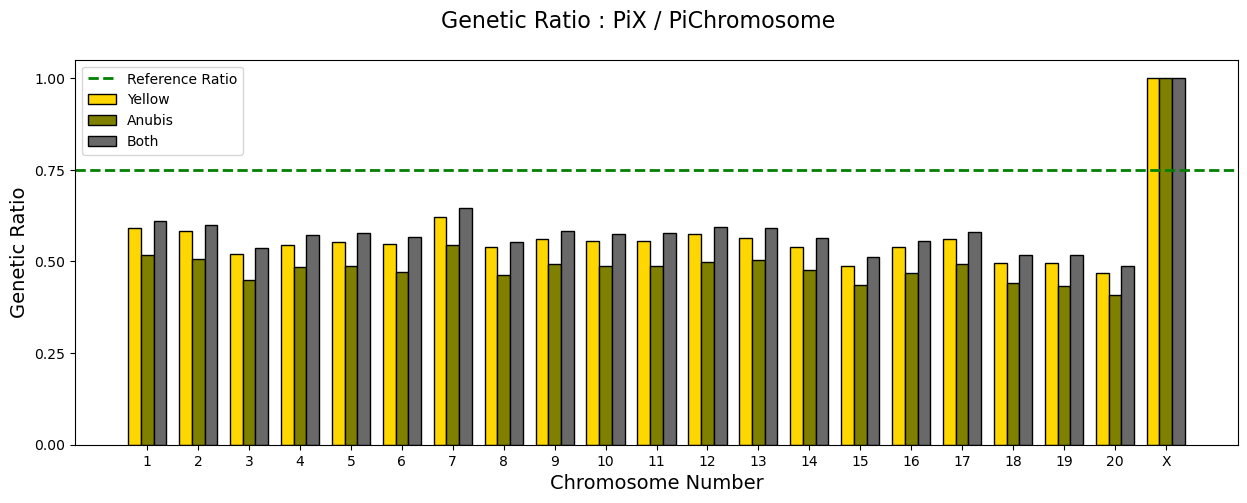

In [6]:
import matplotlib.pyplot as mp
import numpy as np
import os 

FOLDER_Yel = "/mnt/primevo/work/timothe_dandoy/SLiM_Project/tmp/Reel_Data/Yellow/"
FOLDER_Anu = "/mnt/primevo/work/timothe_dandoy/SLiM_Project/tmp/Reel_Data/Anubis/"
FOLDER_All = "/mnt/primevo/work/timothe_dandoy/SLiM_Project/tmp/Reel_Data/All/"
FOLDER_Length = "/mnt/primevo/work/timothe_dandoy/SLiM_Project/scripts/Reel_Data/SLiM/"
FOLDER_output = "/mnt/primevo/work/timothe_dandoy/SLiM_Project/done/Reel_Data/"

Chr = [i for i in range (1,22)]

L_Pi_yel = [0 for i in range (0,21)]
L_Pi_anu = [0 for i in range (0,21)]
L_Pi_all = [0 for i in range (0,21)]
L_Ratio_yel = [0 for i in range (0,21)]
L_Ratio_anu = [0 for i in range (0,21)]
L_Ratio_all = [0 for i in range (0,21)]
#L_Length = [0 for i in range (0,21)]

for i in Chr:
    File = FOLDER_Yel+f"reel_pi_SLiM_{i}.txt"
    if os.path.isfile(File):
        Text = open(File, 'r')
        Values = Text.read().split()
        if len(Values) > 0:
            L_Pi_yel[i-1] = float(Values[0])
        Text.close()

    File = FOLDER_Anu+f"reel_pi_SLiM_{i}.txt"
    if os.path.isfile(File):
        Text = open(File, 'r')
        Values = Text.read().split()
        if len(Values) > 0:
            L_Pi_anu[i-1] = float(Values[0])
        Text.close()

    File = FOLDER_All+f"reel_pi_SLiM_{i}.txt"
    if os.path.isfile(File):
        Text = open(File, 'r')
        Values = Text.read().split()
        if len(Values) >0:
            L_Pi_all[i-1] = float(Values[0])
        Text.close()

print("Yellow: ", L_Pi_yel)
print()
print("Anubis: ", L_Pi_anu)
print()
print("All: ", L_Pi_all)
print()

for i in Chr:
    if L_Pi_yel[i-1] != 0:
        L_Ratio_yel[i-1] = L_Pi_yel[-1]/L_Pi_yel[i-1]
    if L_Pi_anu[i-1] != 0:
        L_Ratio_anu[i-1] = L_Pi_anu[-1]/L_Pi_anu[i-1]
    if L_Pi_all[i-1] != 0:
        L_Ratio_all[i-1] = L_Pi_all[-1]/L_Pi_all[i-1]

#File = FOLDER_Length+"length_line.txt"
#Text = open(File, 'r')
#Values = Text.read().split()
#for i in range (len(L_Length)):
#    L_Length[i] = float(Values[(i*2)+1])
#Text.close()


Chr_label = [i for i in range (1,21)]+['X']
#Chr = np.arange(len(Chr_label)) *1.5
Chr = np.arange(len(Chr_label)) *2
width = 0.5

fig, ax = mp.subplots(figsize=(15, 5))
fig.suptitle("Genetic diversity for each Chromosome", fontsize=16)

#ax.bar(Chr-width/2, L_Pi_yel, width, label='Yellow', color='gold', edgecolor='black')
#ax.bar(Chr+width/2, L_Pi_anu, width, label='Anubis', color='olive', edgecolor='black')
ax.bar(Chr-width, L_Pi_yel, width, label='Yellow', color='gold', edgecolor='black')
ax.bar(Chr, L_Pi_anu, width, label='Anubis', color='olive', edgecolor='black')
ax.bar(Chr+width, L_Pi_all, width, label='Both', color='dimgrey', edgecolor='black')
ax.set_xlabel("Chromosome Number",fontsize= 14)
ax.set_ylabel("Genetic Diversity Pi",fontsize= 14)
ax.set_xticks(Chr)
ax.set_xticklabels(Chr_label)
ax.legend()
fig.savefig(FOLDER_output+'Genetic_Diversity.png') 
mp.show()

fig, ax = mp.subplots(figsize=(15, 5))
fig.suptitle("Genetic Ratio : PiX / PiChromosome", fontsize=16)

#ax.bar(Chr-width/2, L_Ratio_yel, width, label='Yellow', color='gold', edgecolor='black')
#ax.bar(Chr+width/2, L_Ratio_anu, width, label='Anubis', color='olive', edgecolor='black')
ax.bar(Chr-width, L_Ratio_yel, width, label='Yellow', color='gold', edgecolor='black')
ax.bar(Chr, L_Ratio_anu, width, label='Anubis', color='olive', edgecolor='black')
ax.bar(Chr+width, L_Ratio_all, width, label='Both', color='dimgrey', edgecolor='black')
ax.axhline(y= 0.75, color='green', linestyle='--',linewidth=2, label='Reference Ratio')
ax.set_xlabel("Chromosome Number",fontsize= 14)
ax.set_ylabel("Genetic Ratio",fontsize= 14)
ax.set_xticks(Chr)
ax.set_xticklabels(Chr_label)
ax.set_yticks([0,0.25,0.5,0.75,1])
ax.legend()
fig.savefig(FOLDER_output+'Diversity_Ratio.png') 
mp.show()

#fig, ax = mp.subplots(figsize=(10, 5))
#fig.suptitle("Length of each Chromosome", fontsize=14)

#ax.bar(Chr, L_Length)
#ax.set_xlabel("Chromosome Number")
#ax.set_ylabel("Number of Nucleotides")
#ax.set_xticks(Chr)
#ax.set_xticklabels(Chr_label)
#fig.savefig(FOLDER_output+'NWFV_MigV2_star.png') 
#mp.show()

